In [1]:
import CalcLoadPlotData as clp
import h5py
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
UnitVelocity_in_cm_per_s = 1e5		
UnitVelocity_in_km_per_s = UnitVelocity_in_cm_per_s / 1e5
UnitLength_in_cm = 3.085678e21 	# kpc---------------------------
UnitLength_in_pc = UnitLength_in_cm / 3.085678e18
UnitLength_in_kpc = UnitLength_in_pc / 1000
UnitMass_in_g = 1.989e43		# 1e10 solar masses-------------
UnitMass_in_Msun = UnitMass_in_g / 1.989e33

UnitDensity_in_cgs = UnitMass_in_g / UnitLength_in_cm**3

g_to_Msun = 1 / 1.989e33
yr_to_sec = 60 * 60 * 24 * 365
sec_to_yr = 1 / yr_to_sec
cm_to_km = 1 / 1e5
cm_to_pc = 1 / 3.085678e18
UnitEnergy_in_erg = UnitMass_in_g * UnitVelocity_in_cm_per_s**2
UnitTime_in_s = UnitLength_in_cm / UnitVelocity_in_cm_per_s
UnitTime_in_yr = UnitTime_in_s * sec_to_yr

m_p = 1.67e-24 # proton mass in g


clp.GetUnitSystem()
clp.SetUnitSystem(UnitVelocity_in_cm_per_s,UnitLength_in_cm,UnitMass_in_g)
clp.GetUnitSystem()

UnitVelocity_in_cm_per_s = 100000.0 
UnitLength_in_cm = 3.085678e+18 
UnitMass_in_g = 1.989e+31
UnitVelocity_in_cm_per_s = 100000.0 
UnitLength_in_cm = 3.085678e+21 
UnitMass_in_g = 1.989e+43


In [3]:
galaxyFolderPath = "/vera/ptmp/gc/xboecker/run/4_galaxy/xeno_diskIC/run_diskIC_wdm/"
galaxyFolderNames = ["output_100x_zOutflow_MomentumInjection"]#,"output_100x_starLifeTime_random_0_to_10Myr_zOutflowBoundaries", "output_10xRes_cooling_SFR", "output_100xRes_cooling_SFR_xenoSN", "output_starLifeTime_random_0_to_10Myr", "output_100xRes_starLifeTime_0", "output_1000xRes_starLifetime_random"]
galaxyDataFolders = np.full(len(galaxyFolderNames),"string long enough so that no entry will be longer than this, because then is would be cut off......................................................................................")

for i in range(len(galaxyFolderNames)):
    galaxyDataFolders[i] = galaxyFolderPath+galaxyFolderNames[i]
    

galaxyBoxSize = 200
galaxyFrameAmount = 199
galaxyFrameNbrMultiplier = 1
TimeBetSnapshot_in_unit_time = 0.01 # ----------

(1,)
0.0
0.0


/tmp/ipykernel_57750/724866797.py:8: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.log10(snCounts), bins=100)


ValueError: supplied range of [-inf, -inf] is not finite

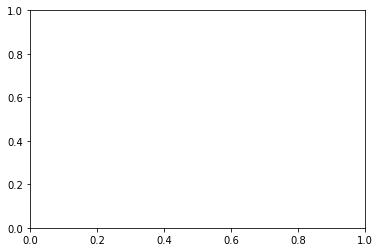

In [4]:
folder = galaxyDataFolders[0]
timeStep = 100

snCounts = clp.getStarsExploded(folder, timeStep)
print(np.shape(snCounts))
print(np.max(snCounts))
print(np.min(snCounts))
plt.hist(np.log10(snCounts), bins=100)
plt.xlabel("log")
plt.yscale("log")

5.078064e-05 (11458,)


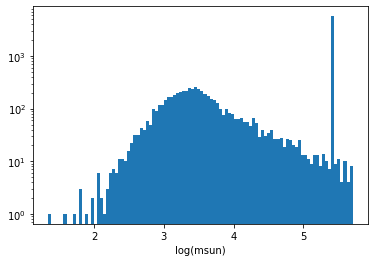

In [8]:
folder = galaxyDataFolders[0]
timeStep = 100

masses = clp.getStarMasses(folder, timeStep)
print(np.max(masses), np.shape(masses))
plt.hist(np.log10(masses * 1e10), bins=100)
plt.xlabel("log(msun)")
plt.yscale("log")

### SFR

calculate data


300

load data
load data
load data
load data


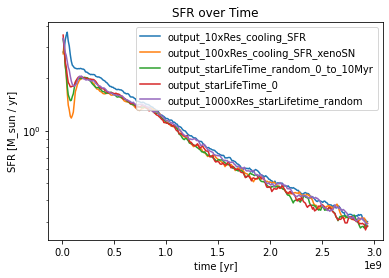

<Figure size 432x288 with 0 Axes>

In [9]:
sfrArray = np.full((len(galaxyFolderNames), galaxyFrameAmount), 0, dtype = np.float64)

for i in range(len(galaxyFolderNames)):
    sfrArray[i] = clp.calculateOrLoadData(folder = galaxyDataFolders[i], 
                                        folderName = galaxyFolderNames[i], 
                                        dataName = "SFR", 
                                        calcDataOfOneSnapShotFunction = clp.getTotalSFR, 
                                        frameAmount = galaxyFrameAmount, 
                                        recalculate = False)



clp.PlotData(data = sfrArray, 
         folderNames = galaxyFolderNames, 
         title = "SFR over Time", 
         ylabel = "SFR [M_sun / yr]", 
         dataName = "SFR", 
         unit_conversion_factor = 1,
         frameAmount = galaxyFrameAmount, 
         frameNbrMultiplier = galaxyFrameNbrMultiplier,
         TimeBetSnapshot_in_unit_time = TimeBetSnapshot_in_unit_time,
         compareToAnalyticRadius = False)

### Stars Exploded vs Time

#### Total #SN

recalculate data


198

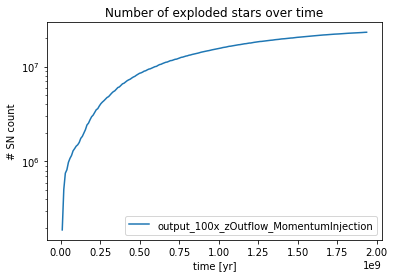

<Figure size 432x288 with 0 Axes>

In [11]:
dataArray = np.full((len(galaxyFolderNames), galaxyFrameAmount), 0, dtype = np.float64)

for i in range(len(galaxyFolderNames)):
    dataArray[i] = clp.calculateOrLoadData(folder = galaxyDataFolders[i], 
                                        folderName = galaxyFolderNames[i], 
                                        dataName = "totalStarsExploded", 
                                        calcDataOfOneSnapShotFunction = clp.getTotalStarsExploded, 
                                        frameAmount = galaxyFrameAmount, 
                                        recalculate = True)

#print(dataArray)

clp.PlotData(data = dataArray, 
         folderNames = galaxyFolderNames, 
         title = "Number of exploded stars over time", 
         ylabel = "# SN count", 
         dataName = "totalStarsExploded", 
         unit_conversion_factor = 1,
         frameAmount = galaxyFrameAmount, 
         frameNbrMultiplier = galaxyFrameNbrMultiplier,
         TimeBetSnapshot_in_unit_time = TimeBetSnapshot_in_unit_time,
         compareToAnalyticRadius = False)

#### SN rate

load data
load data
load data
calculate data


300

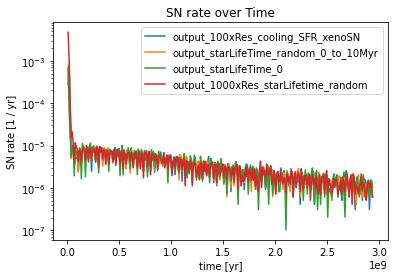

<Figure size 432x288 with 0 Axes>

In [6]:
dataArray = np.full((len(galaxyFolderNames), galaxyFrameAmount), 0, dtype = np.float64)

for i in range(len(galaxyFolderNames)):
    dataArray[i] = clp.calculateOrLoadData(folder = galaxyDataFolders[i], 
                                        folderName = galaxyFolderNames[i], 
                                        dataName = "starsExplodedThisTimeStep", 
                                        calcDataOfOneSnapShotFunction = clp.getStarsExplodedThisTimeStep, 
                                        frameAmount = galaxyFrameAmount, 
                                        recalculate = False)



clp.PlotData(data = dataArray, 
         folderNames = galaxyFolderNames, 
         title = "SN rate over Time", 
         ylabel = "SN rate [1 / yr]", 
         dataName = "starsExplodedThisTimeStep", 
         unit_conversion_factor = 1 / TimeBetSnapshot_in_unit_time / UnitTime_in_yr,
         frameAmount = galaxyFrameAmount, 
         frameNbrMultiplier = galaxyFrameNbrMultiplier,
         TimeBetSnapshot_in_unit_time = TimeBetSnapshot_in_unit_time,
         compareToAnalyticRadius = False)

### Phase Diagram (Density, Temperature)

In [4]:
savePath = "/vera/u/xboecker/jupyterNotebooksOutputs/plots/Galaxy/SFR_Cooling_XenoSN/phaseDiagrams/"
saveFolders = ["1xRes/","10xRes/","100xRes/","1000xRes/"]
for f in range(len(galaxyFolderNames)-1):
    dh = display(0,display_id=True)
    for i in range(galaxyFrameAmount):
        clp.PlotDensityTempPhaseDiagramm(galaxyDataFolders[f], i, galaxyBoxSize, savePath + saveFolders[f])
        dh.update(i)


119

initial temperature: 10712.773473470237K


In [7]:
def plotZMeanValueProfile(folder, timeStep, loadValuesFunction, n_bins, yMin, yMax, scaleFactor, logScaleType, yLabel, savePath):
    # Define position and velocity data
    coos = clp.getCoos(folder, timeStep)[:,2]
    values = loadValuesFunction(folder, timeStep) * scaleFactor
    
    # Create the histogram
    n, bins, patches = plt.hist(coos, bins=n_bins, weights=values, histtype='bar', color='g')

    plt.clf()
    
    plt.figure(figsize=(10, 6), dpi=300)
    
    if(logScaleType == 1):
        plt.yscale("log")
    elif(logScaleType == 2):
        plt.yscale('symlog', linthresh=1)
    
    # Calculate the mean velocity for each bin
    bin_means = np.divide(n, np.histogram(coos, bins=n_bins)[0])
    

    # Plot the mean velocity on the y-axis
    plt.bar(bins[:-1], bin_means, width=np.diff(bins), align='edge', edgecolor='black', alpha=0.5)

    # Add labels to the axes
    plt.title("Time Step: {}".format(timeStep))
    plt.xlabel('z-Position (kpc)')
    plt.ylabel(yLabel)
    
    plt.xlim(0,galaxyBoxSize)
    plt.ylim(yMin, yMax)
    

    # Show the plot
    #plt.show()
    
    plt.savefig(savePath + 'frame_%03d.png' % timeStep)

In [9]:
from tqdm import tqdm

folder = galaxyDataFolders[0]
n_bins = 101
yMin = 1e3
yMax = 3.5e6
yLabel = "Mean Temp [K]"
savePath = "/vera/u/xboecker/jupyterNotebooksOutputs/plots/Galaxy/SFR_Cooling_XenoSN/zProfiles/zMeanTempProfiles100x_zOutflow/"
scaleFactor = 1
logScaleType = 1
getValuesFct = clp.getTemperaturesInKelvin

for i in tqdm(range(galaxyFrameAmount)):
    plotZMeanValueProfile(folder, i, getValuesFct, n_bins, yMin, yMax, scaleFactor, logScaleType, yLabel, savePath)

  0%|                                                   | 0/301 [00:00<?, ?it/s]

initial temperature: 10712.773473470237K


/tmp/ipykernel_68042/223130024.py:19: RuntimeWarning: invalid value encountered in true_divide
  bin_means = np.divide(n, np.histogram(coos, bins=n_bins)[0])
100%|█████████████████████████████████████████| 301/301 [04:11<00:00,  1.20it/s]


In [8]:
from tqdm import tqdm
plt.ioff()

folder = galaxyDataFolders[0]
n_bins = 101
yMin = -500
yMax = 500
yLabel = "Mean Velocity [km/s]"
savePath = "/vera/u/xboecker/jupyterNotebooksOutputs/plots/Galaxy/SFR_Cooling_XenoSN/zProfiles/zMeanVelProfiles100x_zOutflow/"
scaleFactor = UnitVelocity_in_km_per_s
logScaleType = 2
getValuesFct = clp.getZVelocities

for i in tqdm(range(galaxyFrameAmount)):
    plotZMeanValueProfile(folder, i, getValuesFct, n_bins, yMin, yMax, scaleFactor, logScaleType, yLabel, savePath)

  0%|                                                   | 0/301 [00:00<?, ?it/s]/tmp/ipykernel_68042/223130024.py:19: RuntimeWarning: invalid value encountered in true_divide
  bin_means = np.divide(n, np.histogram(coos, bins=n_bins)[0])
  6%|██▋                                       | 19/301 [00:14<03:30,  1.34it/s]/tmp/ipykernel_68042/223130024.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 6), dpi=300)
100%|█████████████████████████████████████████| 301/301 [03:41<00:00,  1.36it/s]


In [10]:
from tqdm import tqdm

folder = galaxyDataFolders[0]
n_bins = 101
yMin = 1e-8
yMax = 1.5e-1
yLabel = "Mean Density [cm-3]"
savePath = "/vera/u/xboecker/jupyterNotebooksOutputs/plots/Galaxy/SFR_Cooling_XenoSN/zProfiles/zMeanDensityProfiles100x_zOutflow/"
scaleFactor = UnitDensity_in_cgs / m_p
logScaleType = 1
getValuesFct = clp.getDensities

for i in tqdm(range(galaxyFrameAmount)):
    plotZMeanValueProfile(folder, i, getValuesFct, n_bins, yMin, yMax, scaleFactor, logScaleType, yLabel, savePath)

  0%|                                                   | 0/301 [00:00<?, ?it/s]/tmp/ipykernel_68042/223130024.py:19: RuntimeWarning: invalid value encountered in true_divide
  bin_means = np.divide(n, np.histogram(coos, bins=n_bins)[0])
100%|█████████████████████████████████████████| 301/301 [04:26<00:00,  1.13it/s]
